# Commonalities among Fans of the Hitchhiker's Guide to the Galaxy

In [1]:
from random import randint
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import chisquare, chi2_contingency
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
import seaborn as sns
from itertools import combinations
from kmodes.kprototypes import KPrototypes
from deepthought import to_float, prop_sem, test_statistic, get_wisdom, p_ztest

I have preprocessed the data into seperate sheets ready to explore which are imported here. Nothing needs to be changed.

In [2]:
survey_data = pd.read_csv("responses cleaned final.csv", index_col=0)
influences = pd.read_csv("sorted_influence.csv", index_col=0)
aspects = pd.read_csv("aspectfinals.csv", index_col=0)
obtained = pd.read_csv("obtained.csv", index_col=0)
survey_data.columns = ["current age", "country", "gender", "HHGG age", "obtained", "other obtained", "influence", "aspect"]
survey_data = survey_data.drop(["obtained", "other obtained"], axis=1)
#work on a copy just to be safe
sd = survey_data.copy()
sd["current age"] = sd["current age"].apply(to_float)
sd["HHGG age"] = sd["HHGG age"].apply(to_float)
sd["year read"] = 2019 - (sd["current age"] - sd["HHGG age"])

## 2.3 First reading age

Let's have a look at our population's numerical data. HHGG age stands for the age respondents were when they first read The Hitchhiker's Guide to the Galaxy. 

_see Computations/Descriptive Stats at  https://pandas.pydata.org/pandas-docs/stable/reference/frame.html for more neat built-in functions to describe our data_

In [3]:
#to get an overview
sd.describe()

,current age,HHGG age,year read
count,595.000000,592.000000,591.000000
mean,29.515126,16.149493,2005.688663
std,9.828527,4.525080,9.997603
min,12.000000,5.000000,1981.000000
25%,22.000000,13.000000,1999.000000
50%,28.000000,15.000000,2007.000000
75%,36.000000,18.000000,2015.000000
max,78.000000,40.000000,2019.000000


A closer look at the age distribution

In [4]:
#transpose for compactness remove the .T to see the full table
pd.DataFrame(sd["current age"].value_counts()).T

,24.0,18.0,22.0,28.0,20.0,33.0,27.0,32.0,23.0,29.0,...,44.0,55.0,46.0,52.0,58.0,60.0,12.0,27.5,61.0,78.0
current age,29,27,26,26,25,24,24,24,24,21,...,4,2,2,2,1,1,1,1,1,1


In [5]:
#transpose for compactness remove the .T to see the full table
pd.DataFrame(sd["HHGG age"].value_counts()).T

,16.0,14.0,12.0,13.0,15.0,17.0,18.0,20.0,19.0,11.0,...,30.0,18.5,37.0,11.5,5.0,27.5,33.0,20.5,35.0,40.0
HHGG age,74,74,59,57,49,38,28,27,26,21,...,2,2,1,1,1,1,1,1,1,1


In [6]:
#transpose for compactness remove the .T to see the full table
pd.DataFrame(sd["year read"].value_counts()).T

,2017.0,2018.0,2016.0,2009.0,2015.0,2006.0,2014.0,2007.0,2005.0,2011.0,...,2005.5,2014.5,1982.5,1991.5,2002.5,1984.5,2011.5,1985.5,2010.5,2018.5
year read,50,32,29,28,28,25,24,23,22,20,...,1,1,1,1,1,1,1,1,1,1


Have a closer look by changing the minimum number of participants for in each age or year, alternatively use the tail and head arguments.

In [7]:
min_value = 25

In [8]:
pd.DataFrame(sd["HHGG age"].value_counts())[sd["HHGG age"].value_counts() > min_value]

,HHGG age
16.0,74
14.0,74
12.0,59
13.0,57
15.0,49
17.0,38
18.0,28
20.0,27
19.0,26


In [9]:
pd.DataFrame(sd["year read"].value_counts())[sd["year read"].value_counts() > min_value]

,year read
2017.0,50
2018.0,32
2016.0,29
2009.0,28
2015.0,28


In [10]:
pd.DataFrame(sd["current age"].value_counts())[sd["current age"].value_counts() > min_value]

,current age
24.0,29
18.0,27
22.0,26
28.0,26


In [11]:
# remove the "#" to unlock this cell, it will display the top 5 values for "HHGG age"
#pd.DataFrame(sd["HHGG age"].value_counts()).head(5)

In [12]:
# remove the "#" to unlock this cell, it will display the lowest 5 values for "HHGG age"
#pd.DataFrame(sd["HHGG age"].value_counts()).tail(5)

The following cells will display visualizations to help us understand our data better.
I chose seaborns' distplot as I feel it represents the numerical distribution best.
You can insert a cell and try out alternative plots with functions from seaborn (recommended) which uses matplotlib's plotting capabilities.
https://seaborn.pydata.org/tutorial/distributions.html


Or you can use matplotlib's functions (https://matplotlib.org/tutorials/introductory/pyplot.html) directly via sd.plot("function name") https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html.

In [13]:
#setting the style for the following plots (find more options at https://seaborn.pydata.org/tutorial/aesthetics.html)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11,8)})

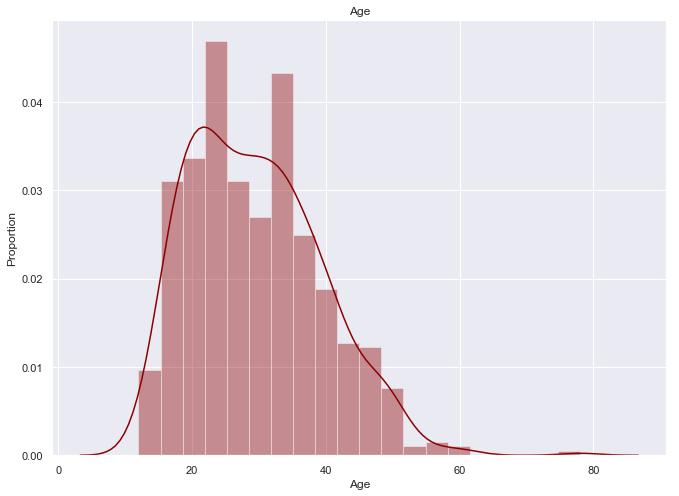

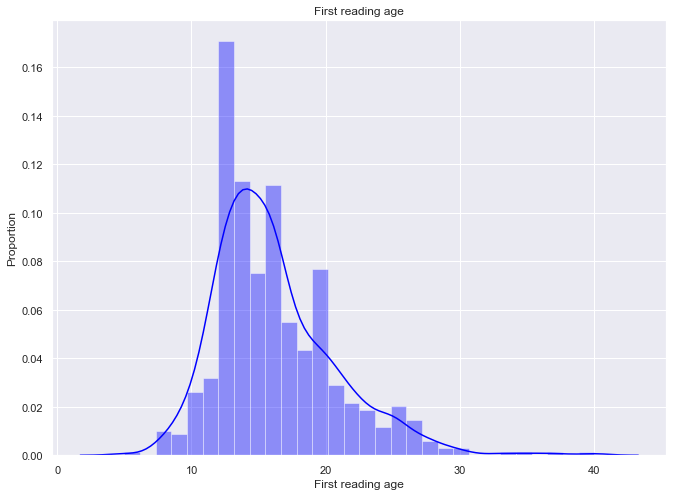

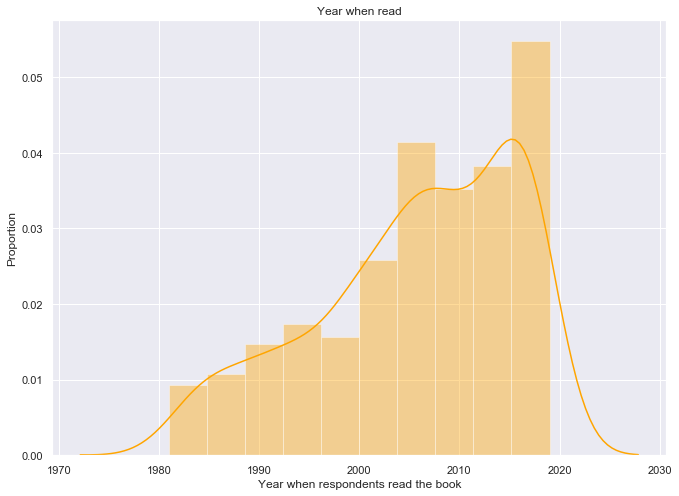

In [14]:
fig = sns.distplot(sd["current age"].dropna(), color='darkred')
fig.set(xlabel="Age", ylabel="Proportion", title="Age")
plt.show()
fig = sns.distplot(sd["HHGG age"].dropna(), color='blue')
fig.set(xlabel="First reading age", ylabel="Proportion", title="First reading age")
plt.show()
fig = sns.distplot(sd["year read"].dropna(), color='orange')
fig.set(xlabel="Year when respondents read the book", ylabel="Proportion", title="Year when read")
plt.show()

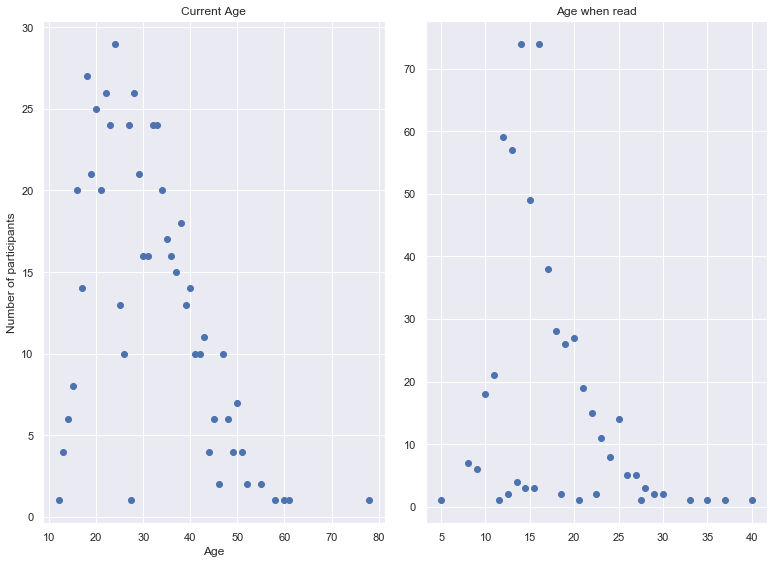

In [15]:
fig = plt.figure()
plot1 = fig.add_subplot(1,2,1)
plot2 = fig.add_subplot(1,2,2)
plot1.set_title("Current Age")
plot2.set_title("Age when read")
plot1.plot(sd["current age"].value_counts(), 'o')
plot2.plot(sd["HHGG age"].value_counts(), 'o')
plot1.set_xlabel('Age')
plot1.set_ylabel("Number of participants")
plot2
fig.tight_layout()

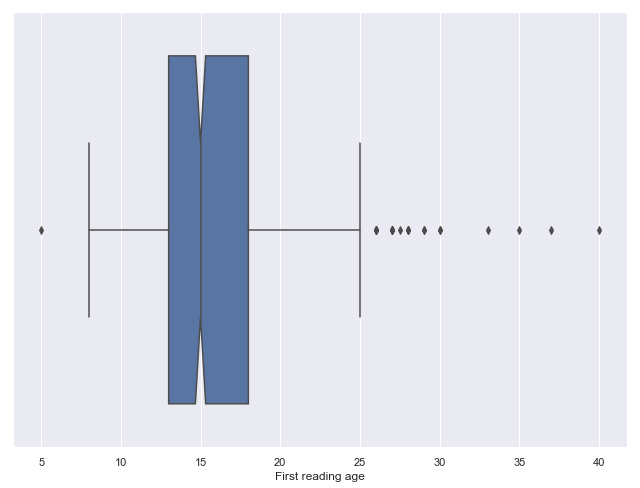

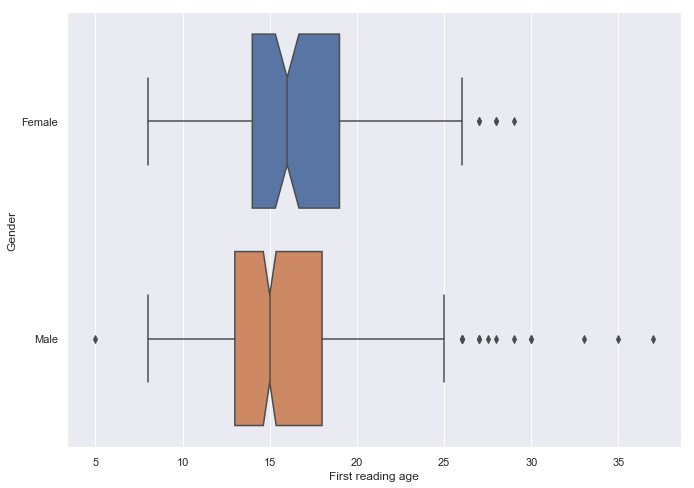

In [16]:
fig = sns.boxplot(x="HHGG age", data=sd, notch=True, orient='h')
fig.set(xlabel="First reading age")
plt.show()
sns.set_style("darkgrid")
fig = sns.boxplot(x="HHGG age", y="gender", data=sd, notch=True)
fig.set(xlabel="First reading age", ylabel="Gender")
plt.show()

## 2.4 How Fans obtained the book
One of the paper's primary goals was to find out if we were more likely to receive this book as a gift. 
Let us, therefore, explore how fans obtained the book.

We start by creating a new data frame that will provide us with some overview of the distribution and then visualizing it.

In [28]:
#for lack of a better name let's call our new df 'counts', feel free to change this
counts = pd.DataFrame(obtained.obtained.value_counts())
counts.columns = ["count"]
counts["Percentage"] = round(((counts["count"] / counts["count"].sum()) * 100), 2)
proportions = counts["Percentage"] / 100
counts["Margin of Error in %"] = round((prop_sem(proportions, 591)*1.96)*100,2)
counts["way"] = counts.index

In [27]:
counts

,count,Percentage,Margin of Error in %,way
Bought it for myself,267,45.18,4.01,Bought it for myself
Given to me as a gift,144,24.37,3.46,Given to me as a gift
Library,71,12.01,2.62,Library
Borrowed from Family,56,9.48,2.36,Borrowed from Family
Borrowed from friends,26,4.40,1.65,Borrowed from friends
Online Platform,6,1.02,0.81,Online Platform
Borrowed from Friends or Family,6,1.02,0.81,Borrowed from Friends or Family
Pirated,5,0.85,0.74,Pirated
Doesn't Remember,3,0.51,0.57,Doesn't Remember
No Answer,2,0.34,0.47,No Answer


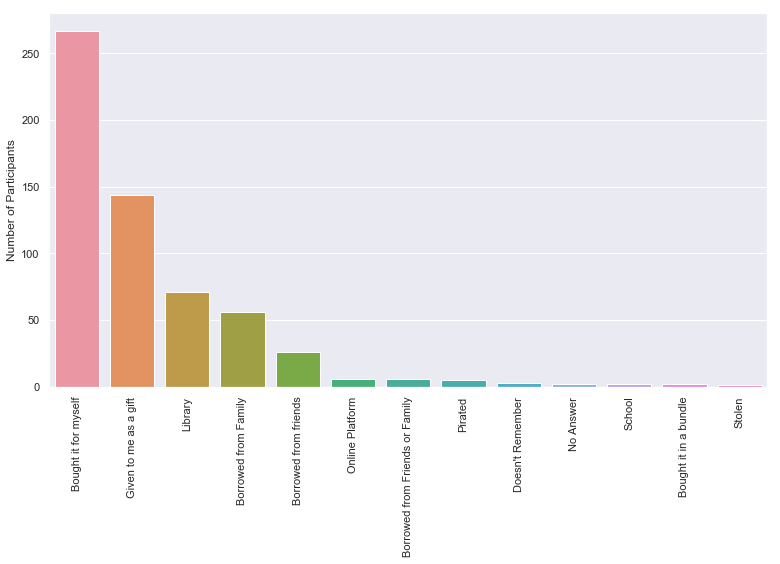

In [25]:
plot = sns.barplot(x="way", y="count", data=counts)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set_ylabel("Number of Participants")
plot.set_xlabel("")
plt.tight_layout()

In [ ]:
get_wisdom()